<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer,mean_absolute_error

from tqdm import tqdm

*1.1. Откройте файлы и изучите их.*

In [ ]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


***1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака.***

*Для расчета будем использовать формулу приведенную ниже.*

![image.png](attachment:image.png)

где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [ ]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

In [ ]:
recovery = (c*(f-t))/(f*(c-t))*100

In [ ]:
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [ ]:
df_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [ ]:
target = df_train['rougher.output.recovery']


mean_absolute_error(df_train['rougher.output.recovery'], recovery)

9.73512347450521e-15

*При визуальном сравнение, а так же отталкиваясь от значения МАЕ, можно сделать вывод, что значение эффективность обогащения рассчитана правильно*

***1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?***

In [ ]:
df_test_cols = list(df_train.columns.difference(df_test.columns))
df_test_cols

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

*В тестовой выборке недоступны признаки, которые получаются после флотации. Иными словами доступны только данные получаемые на входе до очистки сырья. Так же не доступны целевые признаки ['rougher.output.recovery','final.output.recovery']*

***1.4. Проведите предобработку данных.***

Проверим пропуски в данных

In [ ]:
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [ ]:
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [ ]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Так как данные индексируются датой, заполнинить пропуски можно методами pandas: ffill / bfill / интерполяция, - это вполне уместно.

In [ ]:
df_train = df_train.fillna(method ='ffill')
df_full = df_full.ffill(axis = 0)
df_test = df_test.ffill(axis = 0)

***По итогу первой части была проведена предобработка данных(были очищены пропуски).
Проверил правильность подсчета целевого признака rougher.output.recovery.Проверил какие столбцы недоступны для тестовой выборки.Заполнены пропуски***

## Анализ данных

*2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.*

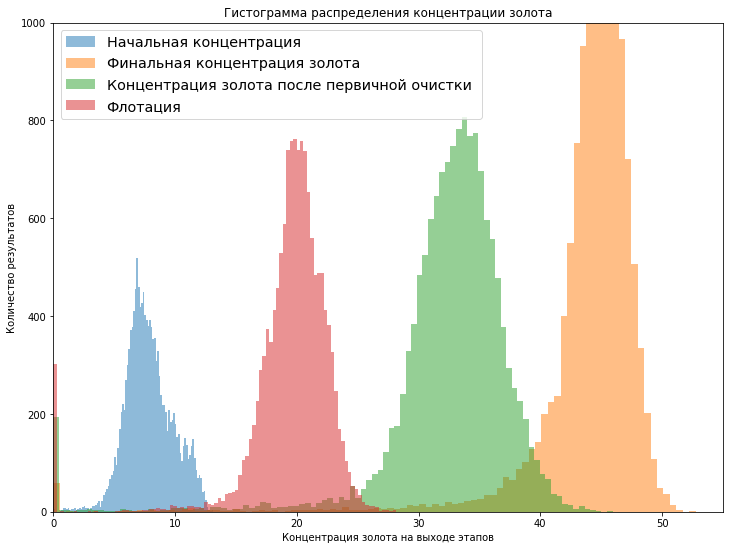

In [ ]:
plt.figure(figsize=[12,9])
plt.hist(df_train['rougher.input.feed_au'], bins=100, label = 'Начальная концентрация', alpha= 0.5)
plt.hist(df_train['final.output.concentrate_au'], bins=100, label = 'Финальная концентрация золота', alpha= 0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'Концентрация золота после первичной очистки ', alpha= 0.5)
plt.hist(df_train['rougher.output.concentrate_au'], bins=100, label = 'Флотация', alpha= 0.5)

plt.xlim([0, 55])
plt.ylim([0, 1000])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

*Как видно из графика, концентрация золота растет с каждой стадией. Цель тех процесса увеличение концентрации золота*

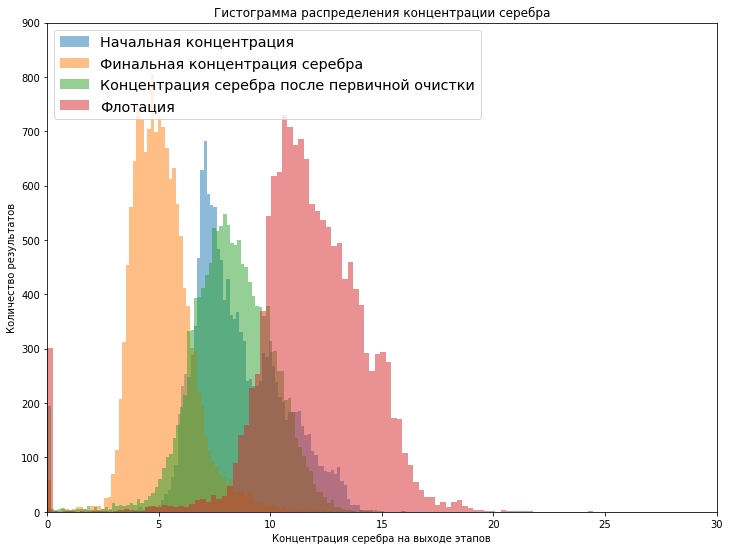

In [ ]:
plt.figure(figsize=[12,9])
plt.hist(df_train['rougher.input.feed_ag'], bins=100, label = 'Начальная концентрация', alpha= 0.5)
plt.hist(df_train['final.output.concentrate_ag'], bins=100, label = 'Финальная концентрация серебра', alpha= 0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Концентрация серебра после первичной очистки', alpha= 0.5)
plt.hist(df_train['rougher.output.concentrate_ag'], bins=100, label = 'Флотация', alpha= 0.5)

plt.xlim([0, 30])
plt.ylim([0, 900])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

*Концентрация серебра падает с каждым этапом очистки. Самая большая концентрация на этапе флотации*

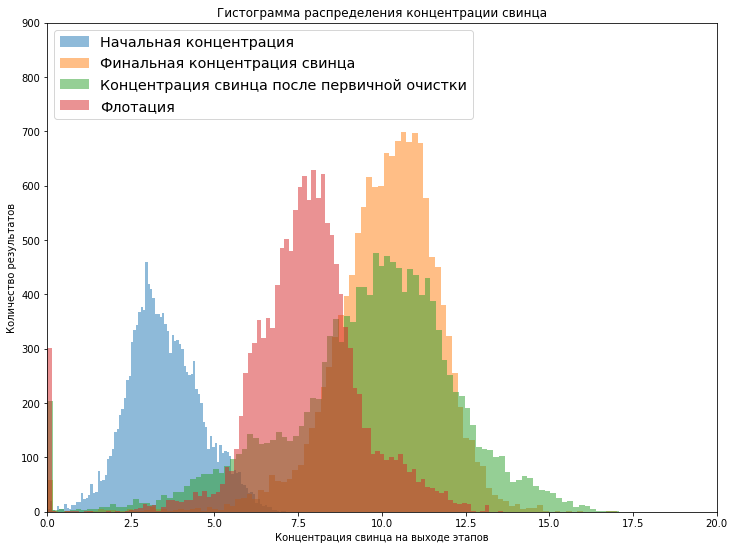

In [ ]:
plt.figure(figsize=[12,9])
plt.hist(df_train['rougher.input.feed_pb'], bins=100, label = 'Начальная концентрация', alpha= 0.5)
plt.hist(df_train['final.output.concentrate_pb'], bins=100, label = 'Финальная концентрация свинца', alpha= 0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Концентрация свинца после первичной очистки', alpha= 0.5)
plt.hist(df_train['rougher.output.concentrate_pb'], bins=100, label = 'Флотация', alpha= 0.5)
plt.xlim([0, 20])
plt.ylim([0, 900])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

*Концентрация свинца вырастает после первичной очистки и падает на финальной стадии.*


*2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.*

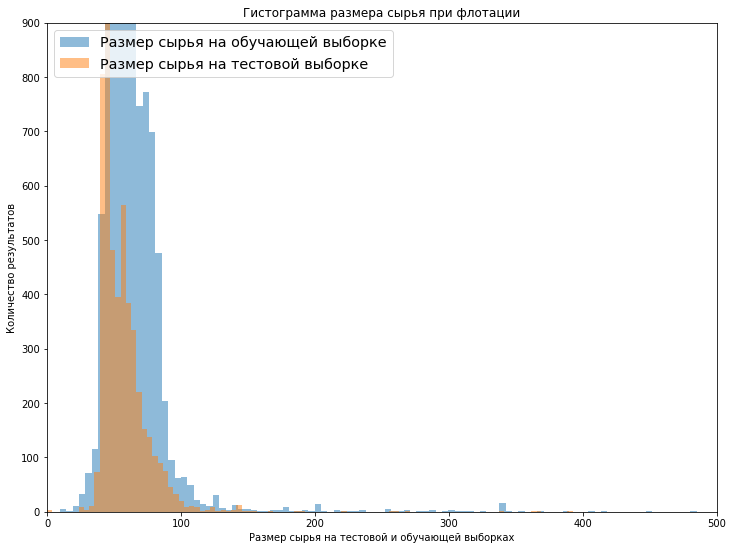

In [ ]:
plt.figure(figsize=[12,9])

plt.hist(df_train['rougher.input.feed_size'], bins=100, label = 'Размер сырья на обучающей выборке', alpha= 0.5)
plt.hist(df_test['rougher.input.feed_size'], bins=100, label = 'Размер сырья на тестовой выборке', alpha= 0.5)
plt.xlim([0,500 ])
plt.ylim([0, 900])

plt.xlabel("Размер сырья на тестовой и обучающей выборках")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма размера сырья при флотации")
plt.show()

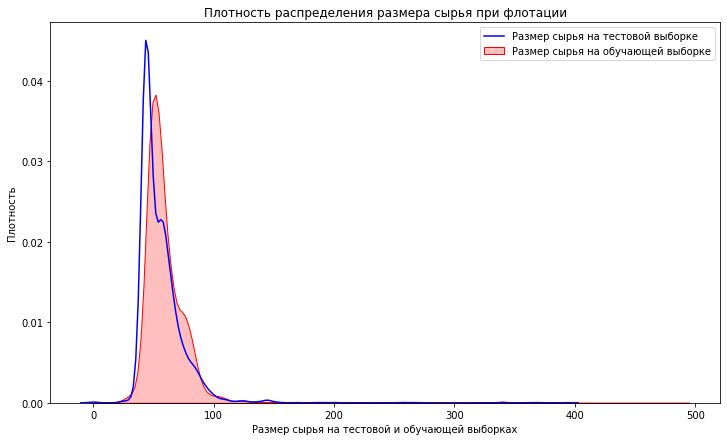

In [ ]:
plt.figure(figsize=[12,7])

sns.kdeplot(df_train['rougher.input.feed_size'],color='red',shade=True)
sns.kdeplot(df_test['rougher.input.feed_size'],color='blue')
plt.xlabel("Размер сырья на тестовой и обучающей выборках")
plt.ylabel("Плотность")
plt.legend (('Размер сырья на тестовой выборке', 'Размер сырья на обучающей выборке'))
plt.title("Плотность распределения размера сырья при флотации")
plt.show()

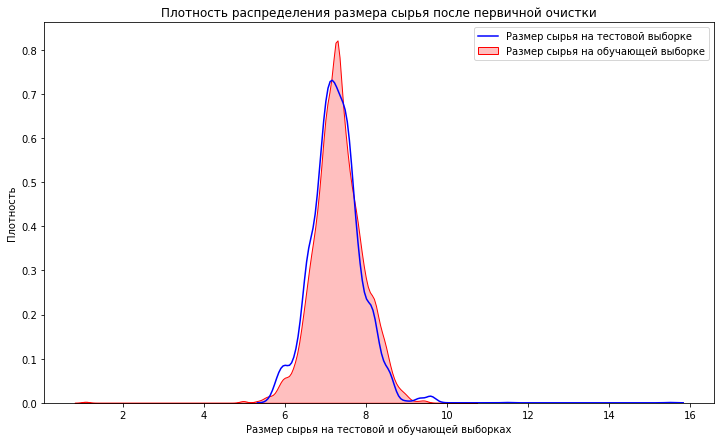

In [ ]:
plt.figure(figsize=[12,7])

sns.kdeplot(df_train['primary_cleaner.input.feed_size'],color='red',shade=True)
sns.kdeplot(df_test['primary_cleaner.input.feed_size'],color='blue')
plt.xlabel("Размер сырья на тестовой и обучающей выборках")
plt.ylabel("Плотность")
plt.legend (('Размер сырья на тестовой выборке', 'Размер сырья на обучающей выборке'))
plt.title("Плотность распределения размера сырья после первичной очистки")
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


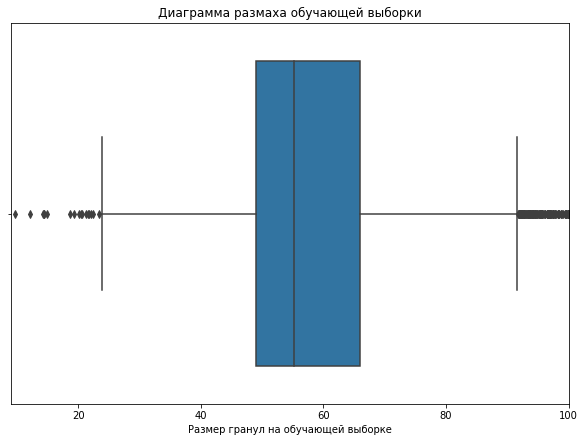

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df_train['rougher.input.feed_size'])
plt.title('Диаграмма размаха обучающей выборки')
plt.xlabel('Размер гранул на обучающей выборке')
plt.xlim(9, 100)
plt.show()
#warnings.simplefilter('ignore')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


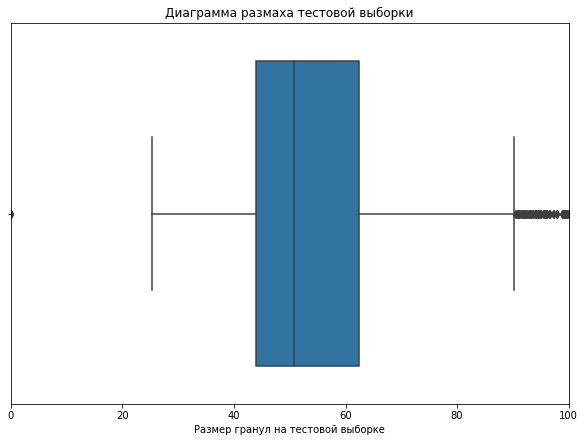

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df_test['rougher.input.feed_size'])
plt.title('Диаграмма размаха тестовой выборки')
plt.xlabel('Размер гранул на тестовой выборке')
plt.xlim(0, 100)
plt.show()
#warnings.simplefilter('ignore')

***Размеры гранул сырья на обучающей и тестовой выборках похожи, имеются выбросы после значения 100 на этапе флотации, и выбросы после значения 10 на этапе первой очистки .***

*2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.*

In [ ]:
rougher_input_feed_sum =(df_train['rougher.input.feed_ag']+
                         df_train['rougher.input.feed_au']+
                         df_train['rougher.input.feed_pb']+
                         df_train['rougher.input.feed_sol'])

final_output_concentrate_sum = (df_train['final.output.concentrate_ag']+
                            df_train['final.output.concentrate_au']+
                            df_train['final.output.concentrate_pb']+
                            df_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum =(df_train['primary_cleaner.output.concentrate_ag']+
                                     df_train['primary_cleaner.output.concentrate_au']+
                                     df_train['primary_cleaner.output.concentrate_pb']+
                                     df_train['primary_cleaner.output.concentrate_sol'])

rougher_output_concentrate_sum = (df_train['rougher.output.concentrate_ag']+
                                  df_train['rougher.output.concentrate_au']+
                                  df_train['rougher.output.concentrate_pb']+
                                  df_train['rougher.output.concentrate_sol'])

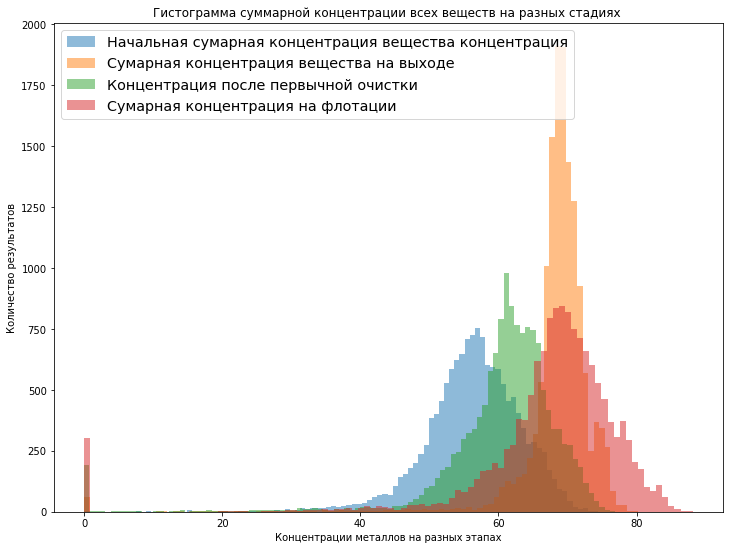

In [ ]:
plt.figure(figsize=[12,9])
plt.hist(rougher_input_feed_sum, bins=100, label = 'Начальная cумарная концентрация вещества концентрация', alpha= 0.5)
plt.hist(final_output_concentrate_sum, bins=100, label = 'Сумарная концентрация вещества на выходе', alpha= 0.5)
plt.hist(primary_cleaner_output_concentrate_sum, bins=100, label = 'Концентрация после первычной очистки', alpha= 0.5)
plt.hist(rougher_output_concentrate_sum, bins=100, label = 'Сумарная концентрация на флотации', alpha= 0.5)


plt.xlabel("Концентрации металлов на разных этапах")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма суммарной концентрации всех веществ на разных стадиях ")
plt.show()

*Суммарная концентрация металов на этапе флотации самоя высокая. После первичной концентрация металов падает, и вырастает после финальной очистки. Исходя из графика видим ряд случаев, когда концентрация нулевая, случай является аномальным, удалим из выборки нулевые значения*

In [ ]:

df_train = (df_train[(df_train['primary_cleaner.output.concentrate_au'] > 1)&
            (df_train['primary_cleaner.output.concentrate_ag'] > 1)&
            (df_train['primary_cleaner.output.concentrate_pb'] > 1)&
            (df_train['primary_cleaner.output.concentrate_sol'] > 1)])

df_train = (df_train[(df_train['rougher.input.feed_au'] > 1)&
            (df_train['rougher.input.feed_ag'] > 1)&
            (df_train['rougher.input.feed_pb'] > 1)&
            (df_train['rougher.input.feed_sol'] > 1)])

df_train = (df_train[(df_train['final.output.concentrate_ag'] > 1)&
            (df_train['final.output.concentrate_au'] > 1)&
            (df_train['final.output.concentrate_pb'] > 1)&
            (df_train['final.output.concentrate_sol'] > 1)])

df_train = (df_train[(df_train['rougher.output.concentrate_ag'] > 1)&
            (df_train['rougher.output.concentrate_au'] > 1)&
            (df_train['rougher.output.concentrate_pb'] > 1)&
            (df_train['rougher.output.concentrate_sol'] > 1)])


df_train[df_train['primary_cleaner.output.concentrate_sol'] == 0].head()


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


**Вывод:
Концентрация золота растет с каждым этапом этапом.
Концентрация серебра напротив падает с каждым этапом.
Концентрация свинца падает на первом этапе и вновь растет после финальной очистки.
Отсюда видим не прямолинейный график сумарной концентрации металов по стадиям.
Размер гранул тестовой и обучающей выборки сопостовим.**

## Модель

*3.1. Напишите функцию для вычисления итоговой sMAPE.*

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
def smape(target, predictions):
    return 1/len(target) * np.sum(2 * np.abs(
       target - predictions) / (np.abs(target) + np.abs(predictions))*100)
def end_smape(rougher, final):
    return 0.25*rougher + 0.75*final

*3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.*

*Для начала подготовим даннык к машинному обучение(для этого удаляем из обучающей выборки столбцы, которые отсутствуют в тестовой). Далее добавляем в тестовую выборку целевые признаки из df_full по индексам.*


In [ ]:
df_train1=df_train.copy()
df_train1.drop(['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol'],axis = 1,inplace = True)


In [ ]:
df_test = df_test.set_index('date')#Преобразуем столбец с временеи в индекс и по индексу добавляем целевой признак в df_test
df_full = df_full.set_index('date')#Из df_full
df_train1 = df_train1.set_index('date')

df_test = df_test.join(df_full[['rougher.output.recovery','final.output.recovery']])

In [ ]:
df_test['rougher.output.recovery']

date
2016-09-01 00:59:59    89.993421
2016-09-01 01:59:59    88.089657
2016-09-01 02:59:59    88.412756
2016-09-01 03:59:59    87.360133
2016-09-01 04:59:59    83.236367
                         ...    
2017-12-31 19:59:59    95.172585
2017-12-31 20:59:59    94.575036
2017-12-31 21:59:59    93.018138
2017-12-31 22:59:59    92.599042
2017-12-31 23:59:59    91.177695
Name: rougher.output.recovery, Length: 5290, dtype: float64

In [ ]:
df_train1['rougher.output.recovery']

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 13304, dtype: float64

In [ ]:
#Делим выборки на features и target
features_train = df_train1.drop(['rougher.output.recovery','final.output.recovery'],axis = 1)
target_train_r = df_train1['rougher.output.recovery']
target_train_f = df_train1['final.output.recovery']

features_test = df_test.drop(['rougher.output.recovery','final.output.recovery'],axis = 1)
target_test_r = df_test['rougher.output.recovery']
target_test_f = df_test['final.output.recovery']

In [ ]:
scorer = make_scorer(smape,greater_is_better=False)

In [ ]:
#Обучаем линейную регрессию
model_linear_r = LinearRegression()
model_linear_r.fit(features_train,target_train_r)
scores_linear_r = cross_val_score(model_linear_r, features_train,target_train_r, cv=5,scoring = scorer)
scores_r = scores_linear_r.mean()

model_linear_f = LinearRegression()
model_linear_f.fit(features_train,target_train_f)
scores_linear_f = cross_val_score(model_linear_f, features_train,target_train_f, cv=5,scoring = scorer)
scores_f = scores_linear_f.mean()
print('Фиинальный smape, для линейной регрессии',abs(end_smape(scores_r,scores_f)))

Фиинальный smape, для линейной регрессии 9.82786784526745


*Метрика smape для линейной регрессии 9.82786784526745*

<div class="alert alert-info">
Попробовал поменять количество фолдов, качество сильно падает. По крайней мере у регрессси.

In [ ]:

%%time
scorer = make_scorer(smape)
for depth in range(1,15):
    model_tree_r = DecisionTreeRegressor(random_state=12345,max_depth=depth)# Обучаем деревья решений
    model_tree_f = DecisionTreeRegressor(random_state=12345,max_depth=depth)
    model_tree_r.fit(features_train,target_train_r)
    model_tree_f.fit(features_train,target_train_f)
    scores_tree_r = cross_val_score(model_tree_r, features_train,target_train_r, cv=5,scoring = scorer)
    scores_tree_f = cross_val_score(model_tree_f, features_train,target_train_f, cv=5,scoring = scorer)
    scores_mean_tree_r = scores_tree_r.mean()
    scores_mean_tree_f=  scores_tree_f.mean()
    print('depth =',depth,'Фиинальный smape, для случайного леса',abs(end_smape(scores_mean_tree_r,scores_mean_tree_f)))

depth = 1 Фиинальный smape, для случайного леса 8.851761050340075
depth = 2 Фиинальный smape, для случайного леса 8.668306845936076
depth = 3 Фиинальный smape, для случайного леса 8.572466663890657
depth = 4 Фиинальный smape, для случайного леса 9.001779546701542
depth = 5 Фиинальный smape, для случайного леса 8.82399298545447
depth = 6 Фиинальный smape, для случайного леса 9.382378565912587
depth = 7 Фиинальный smape, для случайного леса 10.10071085992681
depth = 8 Фиинальный smape, для случайного леса 10.864589068680832
depth = 9 Фиинальный smape, для случайного леса 10.668941422104133
depth = 10 Фиинальный smape, для случайного леса 11.695148762798585
depth = 11 Фиинальный smape, для случайного леса 11.716435912669848
depth = 12 Фиинальный smape, для случайного леса 12.019716501055402
depth = 13 Фиинальный smape, для случайного леса 11.521276617590019
depth = 14 Фиинальный smape, для случайного леса 13.848702077666365
CPU times: user 1min 5s, sys: 73.8 ms, total: 1min 5s
Wall time: 

*Лучшая метрика smape = 8.572466663890657. При глубине деревьев max_depth = 3*

In [ ]:
%%time
for est in range(1, 181, 30):
    for depth in range(3, 6):
        model_forest_r = RandomForestRegressor(random_state=12345, n_estimators= est,max_depth=depth)
        model_forest_f = RandomForestRegressor(random_state=12345, n_estimators= est,max_depth=depth)
        model_forest_r.fit(features_train,target_train_r)
        model_forest_f.fit(features_train,target_train_f)
        scores_forest_r = cross_val_score(model_forest_r, features_train,target_train_r, cv=5,scoring = scorer)
        scores_forest_f = cross_val_score(model_forest_f, features_train,target_train_f, cv=5,scoring = scorer)
        scores_mean_forest_r = scores_forest_r.mean()
        scores_mean_forest_f=  scores_forest_f.mean()
        print("Глубина дерева:", depth,'n_estimators:',est,abs(end_smape(scores_mean_forest_r,scores_mean_forest_f)))

Глубина дерева: 3 n_estimators: 1 8.597951214508019
Глубина дерева: 4 n_estimators: 1 8.725070563850826
Глубина дерева: 5 n_estimators: 1 8.894267058339876
Глубина дерева: 3 n_estimators: 31 8.300028131852441
Глубина дерева: 4 n_estimators: 31 8.154000637121298
Глубина дерева: 5 n_estimators: 31 8.188859849384063
Глубина дерева: 3 n_estimators: 61 8.276434884388042
Глубина дерева: 4 n_estimators: 61 8.094192729280724
Глубина дерева: 5 n_estimators: 61 8.114332697920476
Глубина дерева: 3 n_estimators: 91 8.291599013331826
Глубина дерева: 4 n_estimators: 91 8.116908520918328
Глубина дерева: 5 n_estimators: 91 8.15505040652125
Глубина дерева: 3 n_estimators: 121 8.27873398771872
Глубина дерева: 4 n_estimators: 121 8.112376402071023
Глубина дерева: 5 n_estimators: 121 8.143701787521739
Глубина дерева: 3 n_estimators: 151 8.282201307320367
Глубина дерева: 4 n_estimators: 151 8.118977418816613
Глубина дерева: 5 n_estimators: 151 8.153481854133314
CPU times: user 38min 39s, sys: 3.17 s, total

*Лучший smape=8.094192729280724 при гиперпараметрах :Глубина дерева: 4 n_estimators: 61*

*По итогам тестов лучшая модель случайный лес с параметрами:Глубина дерева: 4 n_estimators: 61
smape=8.094192729280724*

*Проверим лучшую ммодель случайного леса на тестовой выборке*

In [ ]:
final_model_r = RandomForestRegressor(random_state=12345, n_estimators= 64,max_depth=4)
final_model_f = RandomForestRegressor(random_state=12345, n_estimators= 61,max_depth=4)
final_model_r.fit(features_train,target_train_r)
pred_r = final_model_r.predict(features_test)
final_model_f.fit(features_train,target_train_f)
pred_f = final_model_f.predict(features_test)
smape_r = smape(target_test_r, pred_r).mean()
smape_f = smape(target_test_f, pred_f).mean()

print('Финальный smape, для случайного леса', end_smape(smape_r,smape_f))

Финальный smape, для случайного леса 9.450291948959002


*Проверим модели на адекватность используя константную модель*

In [ ]:
from sklearn.dummy import DummyRegressor
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train, target_train_r)
dummy_model_f.fit(features_train, target_train_f)
test_predictions_r = dummy_model_r.predict(features_test)
test_predictions_f = dummy_model_f.predict(features_test)
sm_rougher = smape(target_test_r, test_predictions_r).mean()
sm_final = smape(target_test_f, test_predictions_f).mean()

print('Итоговое sMAPE для DummyRegressor:',end_smape(sm_rougher,sm_final))

Итоговое sMAPE для DummyRegressor: 9.74499284619471


*Итоговая модель работает лучше константной на тестовых данных*

***Исходя из небольшой разницы между констатной моделью sMAPE для DummyRegressor: 9.74499284619471 и модели случайного леса sMAPE = 9.450291948959002, в реальной работе использовать модель проблематично( очень низкая скорость работы модели+метрика не кардинально отличается от константной)***